In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
%matplotlib inline



In [5]:

# loading data 
spotify = pd.read_csv('data.csv')

In [6]:

spotify.head() 

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [7]:
spotify.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [8]:
spotify.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

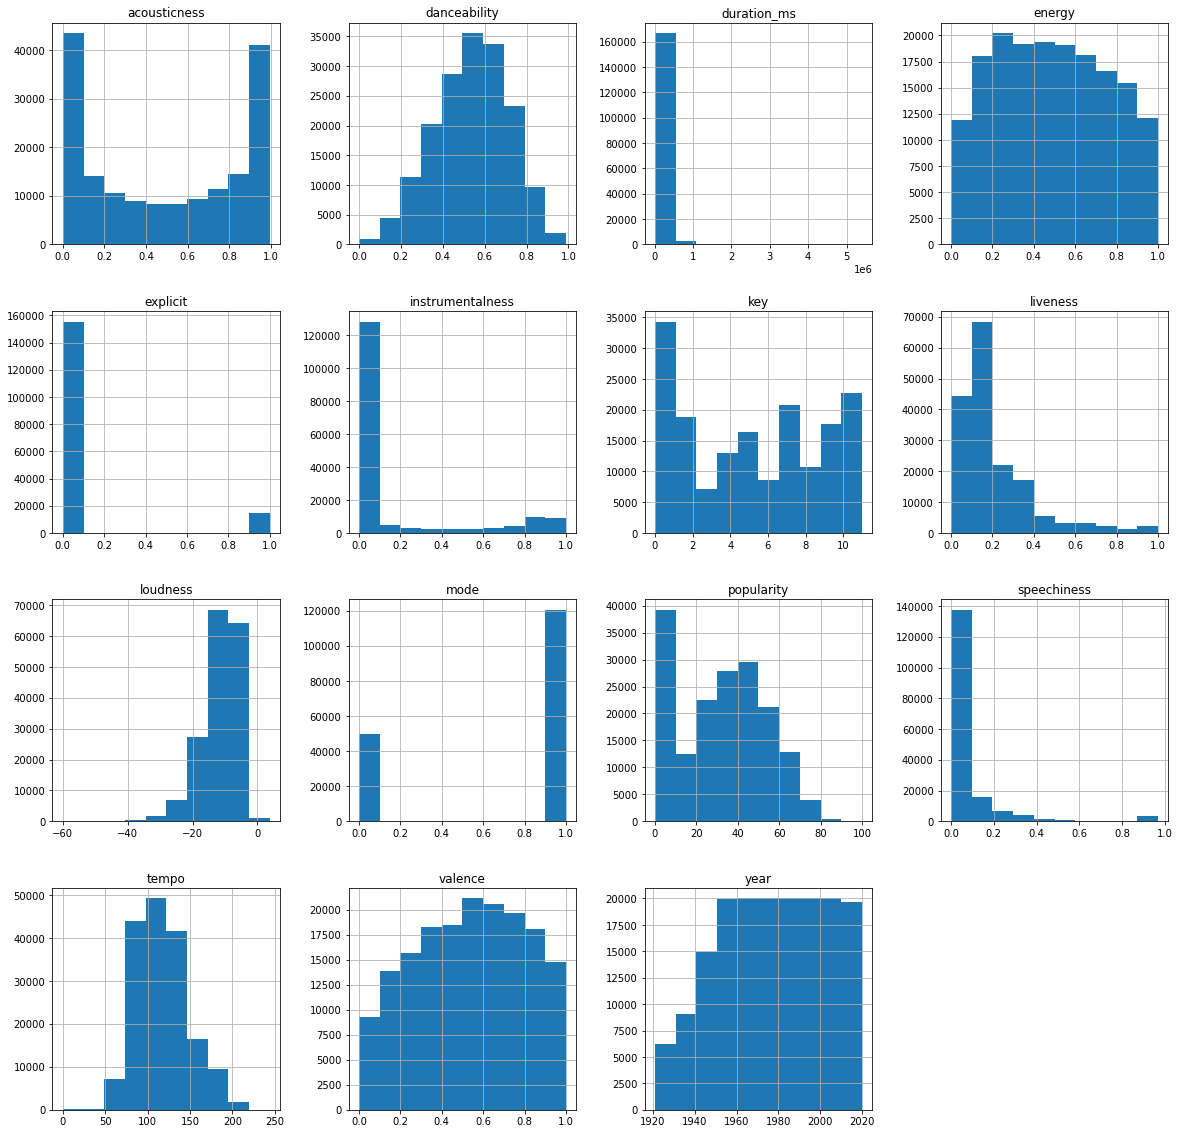

In [9]:
spotify.hist(figsize=(20, 20))
plt.show()

In [10]:
import seaborn as sns

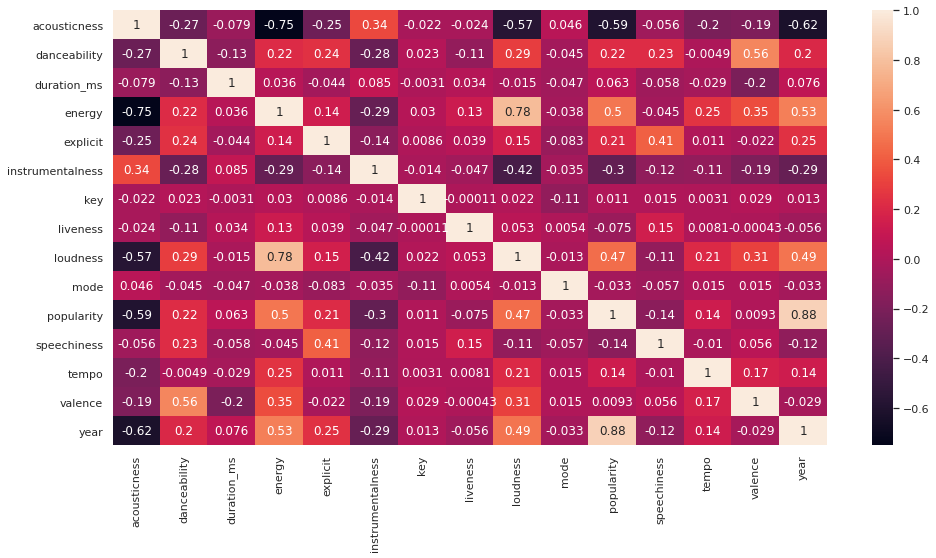

In [11]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = spotify.corr()
sns.heatmap(corr,annot=True)

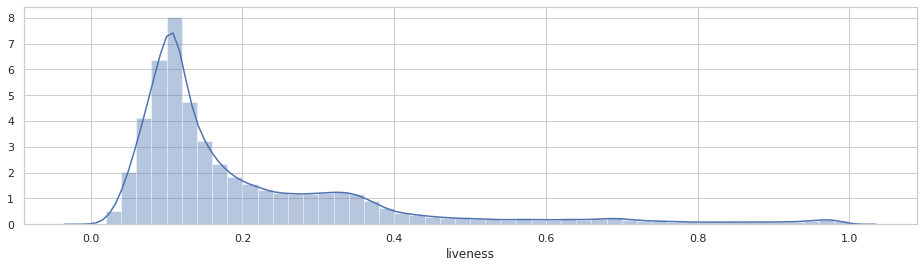

In [12]:
plt.figure(figsize=(16, 4))
sns.distplot(spotify["liveness"])

<Figure size 1152x576 with 0 Axes>

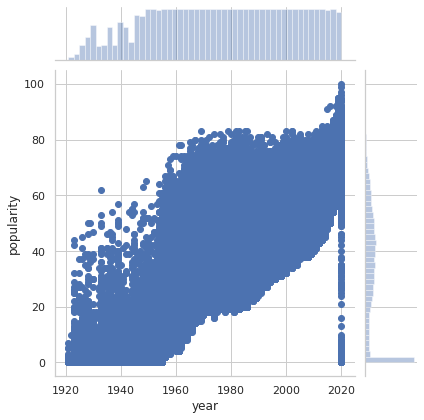

In [13]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=spotify['year'],y=spotify["popularity"],data=spotify)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

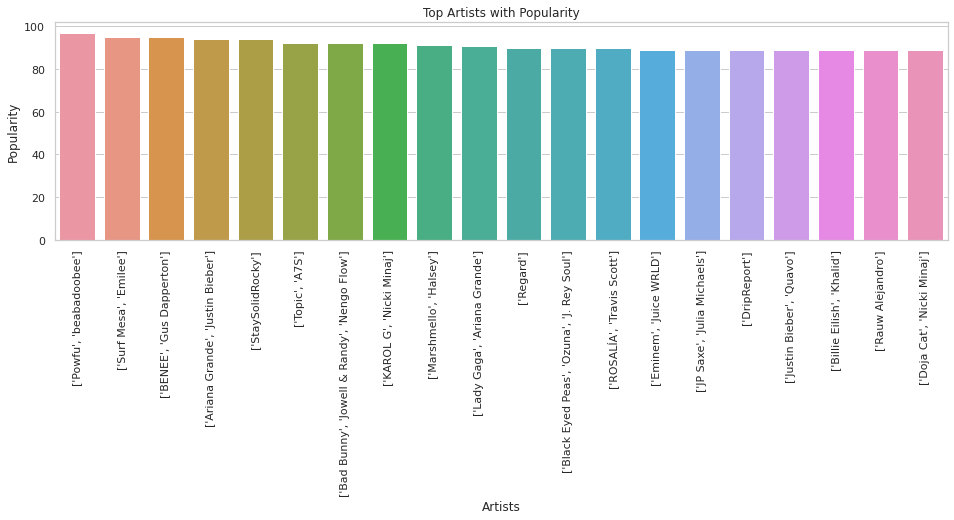

In [15]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = spotify.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)  



Text(0.5, 0, 'Year')

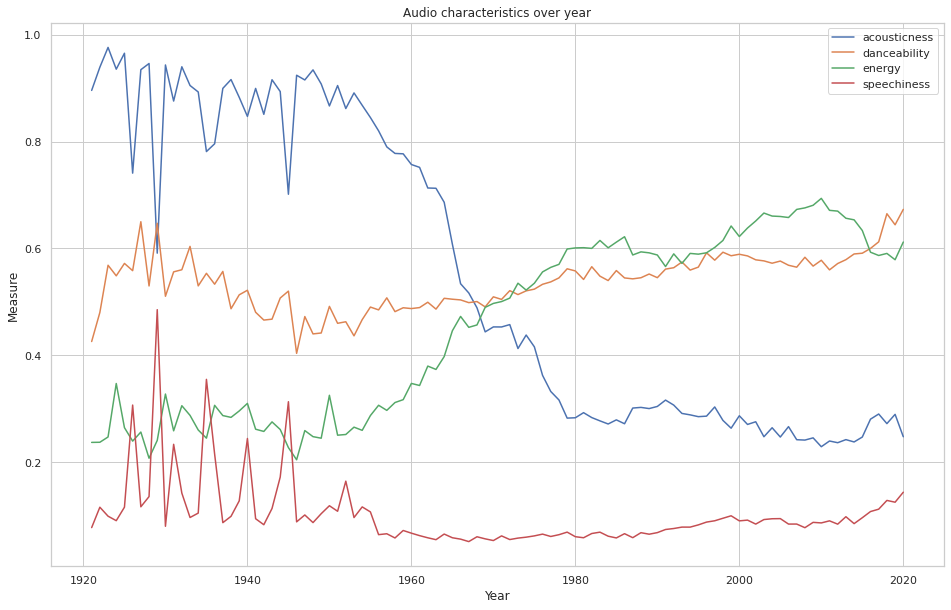

In [21]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

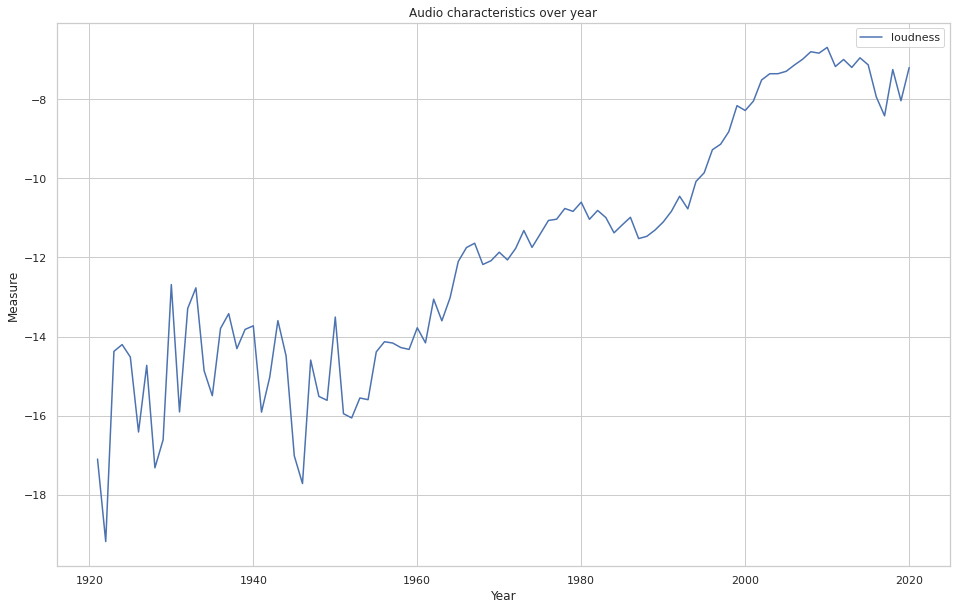

In [23]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

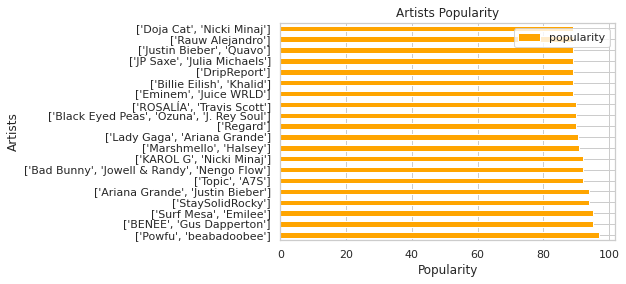

In [25]:
artists_grouped = spotify.groupby(['artists'])
Top20artists = artists_grouped[['popularity']].mean().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='orange')
plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

In [26]:
spotify.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)

artists
['The Beatles']                 19711
['The Rolling Stones']          17670
['Bob Dylan']                   16628
['Elvis Presley']               16343
['Frank Sinatra']               15324
['Led Zeppelin']                13999
['Fleetwood Mac']               13880
['Queen']                       13802
['The Beach Boys']              13789
['Johnny Cash']                 13105
['Bob Marley & The Wailers']    12628
['Taylor Swift']                10711
['Red Hot Chili Peppers']       10463
['Elton John']                  10185
['Eminem']                      10057
['Metallica']                    9527
['Pink Floyd']                   9375
['Miles Davis']                  9348
['Vicente Fernández']            9058
['Stevie Wonder']                8897
Name: popularity, dtype: int64